In [149]:
#Importing all tools I need
import pandas as pd
import numpy as np
import cleaning as cleaning
import seaborn as sns
import re
sns.set(rc = {'figure.figsize':(15,8)})
df = pd.read_csv("../data/attacks.csv", encoding='latin1')

In [150]:
#removing all missing values
cleaning.drop_na(df,"Date")
cleaning.drop_na(df,'Country')
cleaning.drop_na(df,"Fatal (Y/N)")
cleaning.drop_na(df,"Area")

In [151]:
#Cleaning all the fatalities column
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(cleaning.fatality_clean)

In [152]:
#Creating The Categories
unprovoked= df[df["Type"]=='Unprovoked']
provoked = df[df["Type"]=="Provoked"]

C:\Users\HP\AppData\Local\Temp\ipykernel_21520\24645076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unprovoked["Year_1900"] = unprovoked[unprovoked['Year']>1900]['Year']
C:\Users\HP\AppData\Local\Temp\ipykernel_21520\24645076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unprovoked["Year_1900"] = unprovoked[unprovoked["Year_1900"]<2018]["Year_1900"]


<AxesSubplot:>

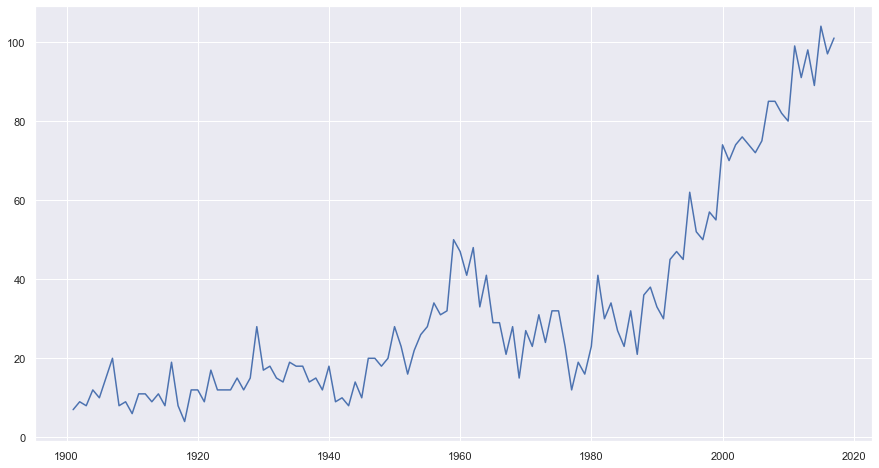

In [153]:
# Graphing unprovoked attacks through 1900 til 2018
unprovoked["Year_1900"] = unprovoked[unprovoked['Year']>1900]['Year']
unprovoked["Year_1900"] = unprovoked[unprovoked["Year_1900"]<2018]["Year_1900"]
unprovoked["Year_1900"].value_counts().sort_index().plot()

C:\Users\HP\AppData\Local\Temp\ipykernel_21520\2745019864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provoked["Year_1900"] = provoked[provoked['Year']>1900]['Year']
C:\Users\HP\AppData\Local\Temp\ipykernel_21520\2745019864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provoked["Year_1900"] = provoked[provoked["Year_1900"]<2018]["Year_1900"]


<AxesSubplot:>

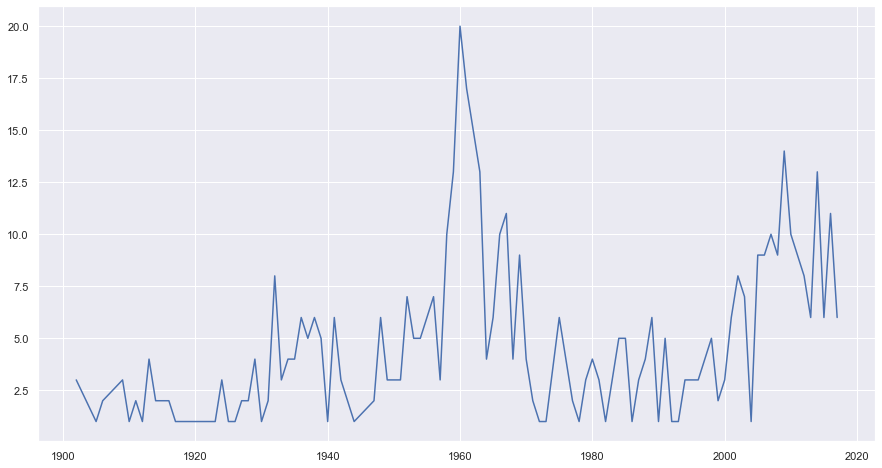

In [154]:
# Graphing provoked category
provoked["Year_1900"] = provoked[provoked['Year']>1900]['Year']
provoked["Year_1900"] = provoked[provoked["Year_1900"]<2018]["Year_1900"]
provoked["Year_1900"].value_counts().sort_index().plot()

<AxesSubplot:>

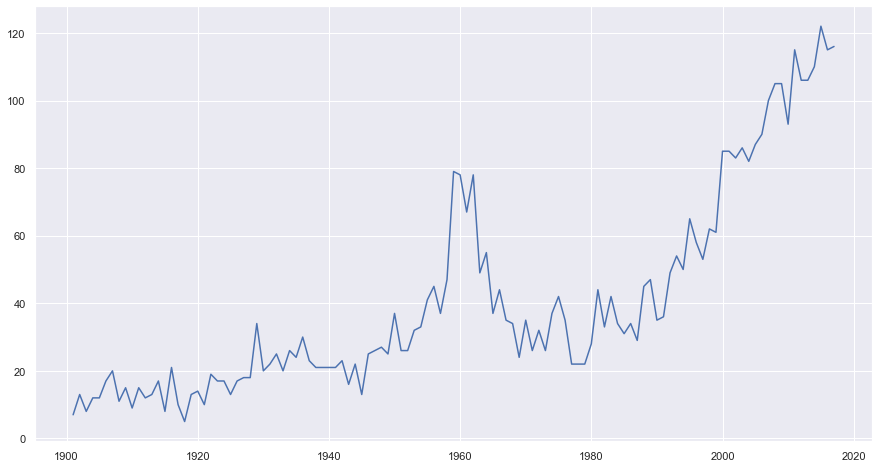

In [155]:
# Graphing all attacks
df["Year_1900"] = df[df['Year']>1900]['Year']
df["Year_1900"] = df[df["Year_1900"]<2018]["Year_1900"]
df["Year_1900"].value_counts().sort_index().plot()

In [157]:
# Filtering the attacks by highest 4
unprovoked = unprovoked.groupby('Country').filter(lambda x : len(x)>90)
print('Most Common Countries in Unprovoked:\n', unprovoked['Country'].value_counts())

Most Common Countries in Unprovoked:
 USA                 1719
AUSTRALIA            922
SOUTH AFRICA         401
PAPUA NEW GUINEA     105
Name: Country, dtype: int64


In [158]:
# Filtering the attacks by highest 3
provoked = provoked.groupby('Country').filter(lambda x : len(x)>20)
print('Most Common Countries in Unprovoked:\n', provoked['Country'].value_counts())

Most Common Countries in Unprovoked:
 USA             207
AUSTRALIA       135
SOUTH AFRICA     53
Name: Country, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

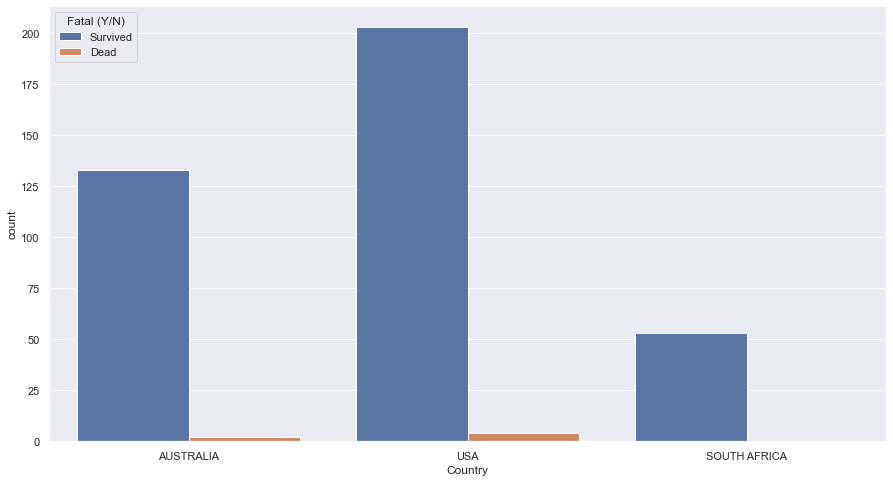

In [131]:
# count ploting provoked data
sns.countplot(provoked['Country'], hue='Fatal (Y/N)', data=provoked)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

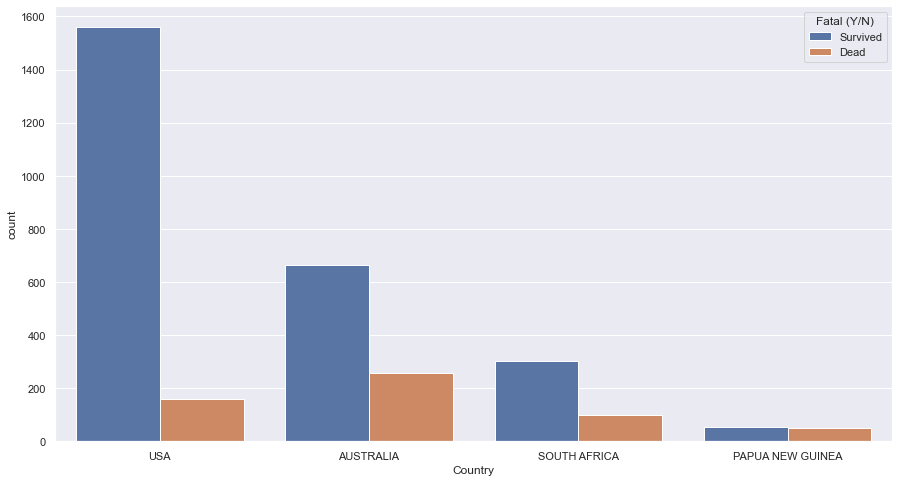

In [134]:
# Count plotting all unprovoked attacks
sns.countplot(unprovoked['Country'], hue='Fatal (Y/N)', data=unprovoked)

In [135]:
# creating subset of all provoked attacks by state
ussp = provoked[provoked['Country']=='USA']
ussp

Case Number                   Date    Year      Type Country  \
104     2017.08.03            03-Aug-2017  2017.0  Provoked     USA   
139     2017.05.30            30-May-2017  2017.0  Provoked     USA   
237     2016.07.27            27-Jul-2016  2016.0  Provoked     USA   
251   2016.07.07.b            07-Jul-2016  2016.0  Provoked     USA   
278     2016.05.15            15-May-2016  2016.0  Provoked     USA   
...            ...                    ...     ...       ...     ...   
5890    1873.07.28            28-Jul-1873  1873.0  Provoked     USA   
5904    1871.08.00               Aug-1871  1871.0  Provoked     USA   
5954    1863.07.09   Reported 09-Jul-1863  1863.0  Provoked     USA   
6062    1842.07.06            06-Jul-1842  1842.0  Provoked     USA   
6226       ND.0087  No date, Before  1975     0.0  Provoked     USA   

                Area                                       Location  \
104    Massachusetts  Menauhant Beach, Falmouth,\nBarnstable County   
139   South Carolina                     Awendaw, Charleston County   
237          Florida                    Florida Keys, Monroe County   
251    Massachusetts                   Off Gloucester, Essec County   
278          Florida                  Boca Raton, Palm Beach County   
...              ...                                            ...   
5890        Maryland                                  Chester River   
5904        New York                                    Long Island   
5954          Hawaii                                         Palama   
6062      New Jersey                       Absecon, Atlantic County   
6226         Florida               Riviera Beach, Palm Beach County   

                                               Activity               Name  \
104                                             Fishing               male   
139                                    Touching a shark  Mackenzie Higgins   
237                                          Lobstering        Warren Sapp   
251                                             Fishing      Roger Brissom   
278                                     Teasing a shark             female   
...                                                 ...                ...   
5890                                  Fishing (Seining)        James Green   
5904                                      Shark fishing                NaN   
5954                                            Fishing               male   
6062                                  Harassing a shark               male   
6226  Skin diving. Grabbed shark's tail; shark turne...       Carl Bruster   

     Sex   ...                   Investigator or Source  \
104     M  ...                       MassLive, 8/4/2017   
139     F  ...                        C. Creswell, GSAF   
237     M  ...               Tampa Bay Times, 7/27/2016   
251     M  ...                      Salem News 7/8/2016   
278     F  ...                      CBS News, 5/16/2016   
...   ...  ...                                      ...   
5890    M  ...                      NY Times, 7/30/1873   
5904    M  ...                New York Times, 8/26/1871   
5954    M  ...  Pacific Commercial Advertiser, 7/9/1863   
6062  NaN  ...         New York Evening Post, 7/11/1842   
6226    M  ...                         R. Skocik, p.176   

                                pdf  \
104    2017.08.03-Massachusetts.pdf   
139          2017.05.30-Higgins.pdf   
237             2016.07.27-Sapp.pdf   
251        2016.07.07.b-Brissom.pdf   
278             2016.05.15-Boca.pdf   
...                             ...   
5890           1873.07.28-Green.pdf   
5904  1871.08.00-SharkFisherman.pdf   
5954          1863.07.09-Palama.pdf   
6062         1842.07.06-Absecon.pdf   
6226       ND-0087-Carl-Bruster.pdf   

                                           href formula  \
104   http://sharkattackfile.net/spreadsheets/pdf_di...   
139   http://sharkattackfile.net/spreadsheets/pdf_di...   
237   htt

In [136]:
# Creating a subset of unprovoked attacks in the states
ussup = unprovoked[unprovoked["Country"]=="USA"]
ussup

Case Number                Date    Year        Type Country  \
1       2018.06.18         18-Jun-2018  2018.0  Unprovoked     USA   
7       2018.05.27         27-May-2018  2018.0  Unprovoked     USA   
8     2018.05.26.b         26-May-2018  2018.0  Unprovoked     USA   
9     2018.05.26.a         26-May-2018  2018.0  Unprovoked     USA   
11      2018.05.21         21-May-2018  2018.0  Unprovoked     USA   
...            ...                 ...     ...         ...     ...   
6249       ND.0056         Before 1958     0.0  Unprovoked     USA   
6283       ND.0019         Before 1921     0.0  Unprovoked     USA   
6288       ND.0014  Before 17-Jul-1916     0.0  Unprovoked     USA   
6292       ND.0010          Circa 1862     0.0  Unprovoked     USA   
6299       ND.0003           1900-1905     0.0  Unprovoked     USA   

                 Area                                           Location  \
1             Georgia                     St. Simon Island, Glynn County   
7             Florida  Lighhouse Point Park, Ponce Inlet, Volusia County   
8             Florida                       Cocoa Beach, Brevard  County   
9             Florida                      Daytona Beach, Volusia County   
11     South Carolina                  Isle of Palms,  Charleston County   
...               ...                                                ...   
6249          Florida                      Palm Beach, Palm Beach County   
6283          Florida                           Gadsden Point, Tampa Bay   
6288  North Carolina             Somewhere between Hatteras and Beaufort   
6292           Hawaii                                               Puna   
6299   North Carolina                                     Ocracoke Inlet   

             Activity                   Name Sex   ...  \
1            Standing        Adyson McNeely     F  ...   
7             Fishing                   male    M  ...   
8             Walking              Cody High    M  ...   
9            Standing                   male    M  ...   
11    Boogie boarding           Trey de Boer    M  ...   
...               ...                    ...  ...  ...   
6249         Standing           Horton Chase    M  ...   
6283          Fishing           James Kelley    M  ...   
6288         Swimming        "youthful male"    M  ...   
6292              NaN           A "chiefess"    F  ...   
6299         Swimming  Coast Guard personnel    M  ...   

                              Investigator or Source  \
1                     K.McMurray, TrackingSharks.com   
7                    K. McMurray, TrackingSharks.com   
8                     K.McMurray, TrackingSharks.com   
9                   K. McMurray, Tracking Sharks.com   
11                                 C. Creswell, GSAF   
...                                              ...   
6249      V.M. Coppleson (1956), p.255;  R.F. Hutton   
6283                                  T. Helm, p.219   
6288  C. Creswell, GSAF; Wilmington Star, 7/17/1916    
6292                                Captain W. Young   
6299            F. Schwartz, p.23; C. Creswell, GSAF   

                                    pdf  \
1                2018.06.18-McNeely.pdf   
7                  2018.05.27-Ponce.pdf   
8                 2018.05.26.b-High.pdf   
9         2018.05.26.a-DaytonaBeach.pdf   
11                2018.05.21-deBoer.pdf   
...                                 ...   
6249            ND-0056-HortonChase.pdf   
6283                 ND-0019-Kelley.pdf   
6288  ND-0014-pre1916-NorthCarolina.pdf   
6292            ND-0010-Puna Hawaii.pdf   
6299     ND-0003-Ocracoke_1900-1905.pdf   

                                           href formula  \
1     http://sharkattackfile.net/spreadsheets/pdf_di...   
7     http://sharkattackfile.net/spreadsheets/pdf_di...   
8     http://sharkattackfile.net/spreadsheets/pdf_di...   
9     http://sharkattackfile.net/spreadsheets/pdf_di...   
11    http://sharkattackfile.net/spreadsheets/pdf_di...   
...         

In [137]:
# Cleaning all Area values for better reading
ussp["Area"] = ussp["Area"].apply(cleaning.stripp)
ussup["Area"] = ussup["Area"].apply(cleaning.stripp)

C:\Users\HP\AppData\Local\Temp\ipykernel_21520\1094083631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ussp["Area"] = ussp["Area"].apply(cleaning.stripp)
C:\Users\HP\AppData\Local\Temp\ipykernel_21520\1094083631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ussup["Area"] = ussup["Area"].apply(cleaning.stripp)


In [138]:
# Checking Data for selecting highest values
ussup['Area'].value_counts()

Florida              866
Hawaii               239
California           183
South Carolina       124
North Carolina        84
Texas                 60
New Jersey            28
Oregon                28
New York              15
Georgia               12
Alabama               12
Virginia              12
Puerto Rico           10
Massachusetts          9
Louisiana              7
Rhode Island           5
US Virgin Islands      4
Delaware               3
Maryland               3
Connecticut            3
Mississippi            3
Washington             2
Midway Atoll           1
Wake Island            1
Palmyra Atoll          1
Johnston Atoll         1
Guam                   1
Maine                  1
East coast             1
Name: Area, dtype: int64

In [139]:
# Checking Data for selecting highest values
ussp['Area'].value_counts()

Florida                   87
California                35
Hawaii                    13
New Jersey                13
South Carolina            10
Texas                      7
New York                   6
Maryland                   4
Massachusetts              3
Virginia                   3
Louisiana                  3
North Carolina             3
Delaware                   3
Connecticut                2
Mississippi                2
Puerto Rico                2
North & South Carolina     1
US Virgin Islands          1
Pennsylvania               1
East coast                 1
Kentucky                   1
Alabama                    1
Missouri                   1
Alaska                     1
New Mexico                 1
Palmyra Atoll              1
Rhode Island               1
Name: Area, dtype: int64

In [140]:
# cleaning data with a selected threshold
ussup = ussup.groupby('Area').filter(lambda x : len(x)>50)
ussp= ussp.groupby('Area').filter(lambda x : len(x)>10)

In [141]:
ussup['Area'].value_counts()

Florida           866
Hawaii            239
California        183
South Carolina    124
North Carolina     84
Texas              60
Name: Area, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='count'>

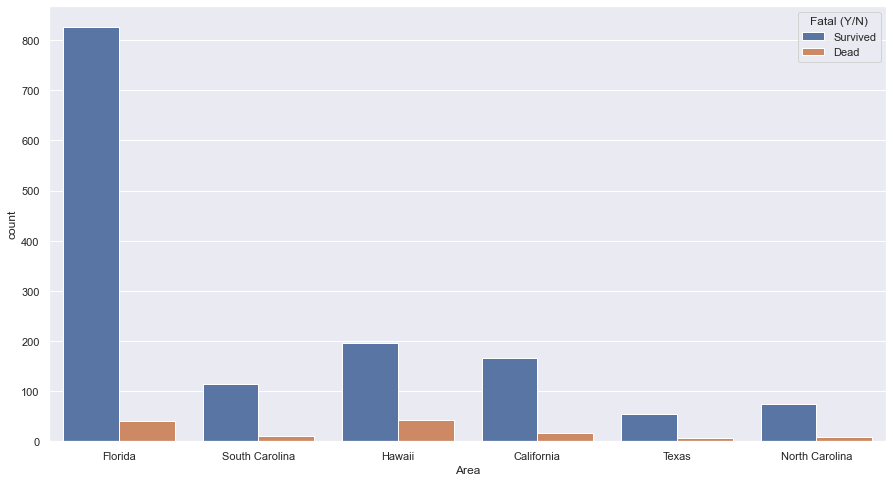

In [142]:
# Countplot of unprovoked attacks in the states
sns.countplot(ussup['Area'], hue='Fatal (Y/N)', data=ussup)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='count'>

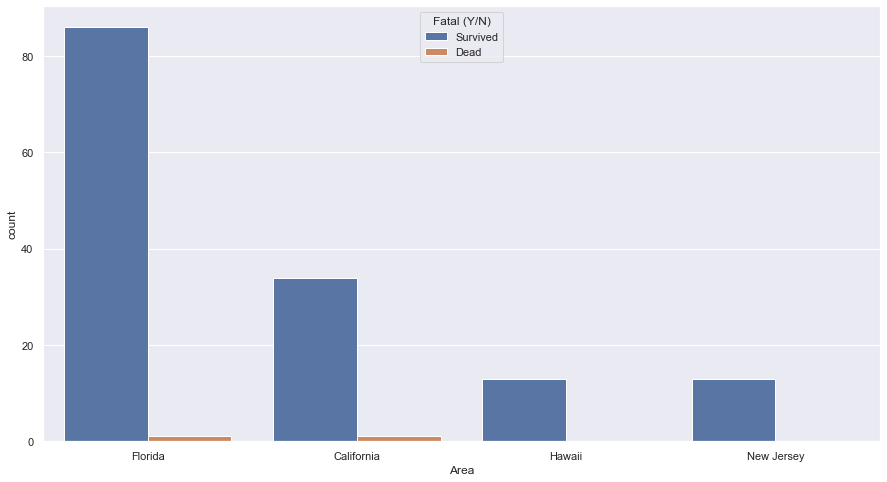

In [143]:
# count plot of all the provoked attacks all states
sns.countplot(ussp['Area'], hue='Fatal (Y/N)', data=ussp)